#### Importing the necessary Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

#### 1. Load the data set

In [2]:
park_df = pd.read_csv("parkinsons.data")

#### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set.

In [3]:
park_df.shape

(195, 24)

In [4]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
#as column name has no use here, we can drop this column
park_df=park_df.drop('name', axis=1)

In [6]:
#checking for missing data
park_df.isnull().values.any()

False

##### Status is the target variable here

In [7]:
X = park_df.drop('status', axis=1)
y = park_df['status']

In [8]:
#lets check the distribution of the Target Variable
park_df.groupby(['status']).size()

status
0     48
1    147
dtype: int64

In [9]:
#Checking summary statistics
park_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### Mean and 50% values are not similar for MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:PPQ, MDVP:RAP, MDVP:shimmer(dB): which could mean that there are outliers. Also, for MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz) the data is not normally distributed. More clarity can be seen in the following plots:


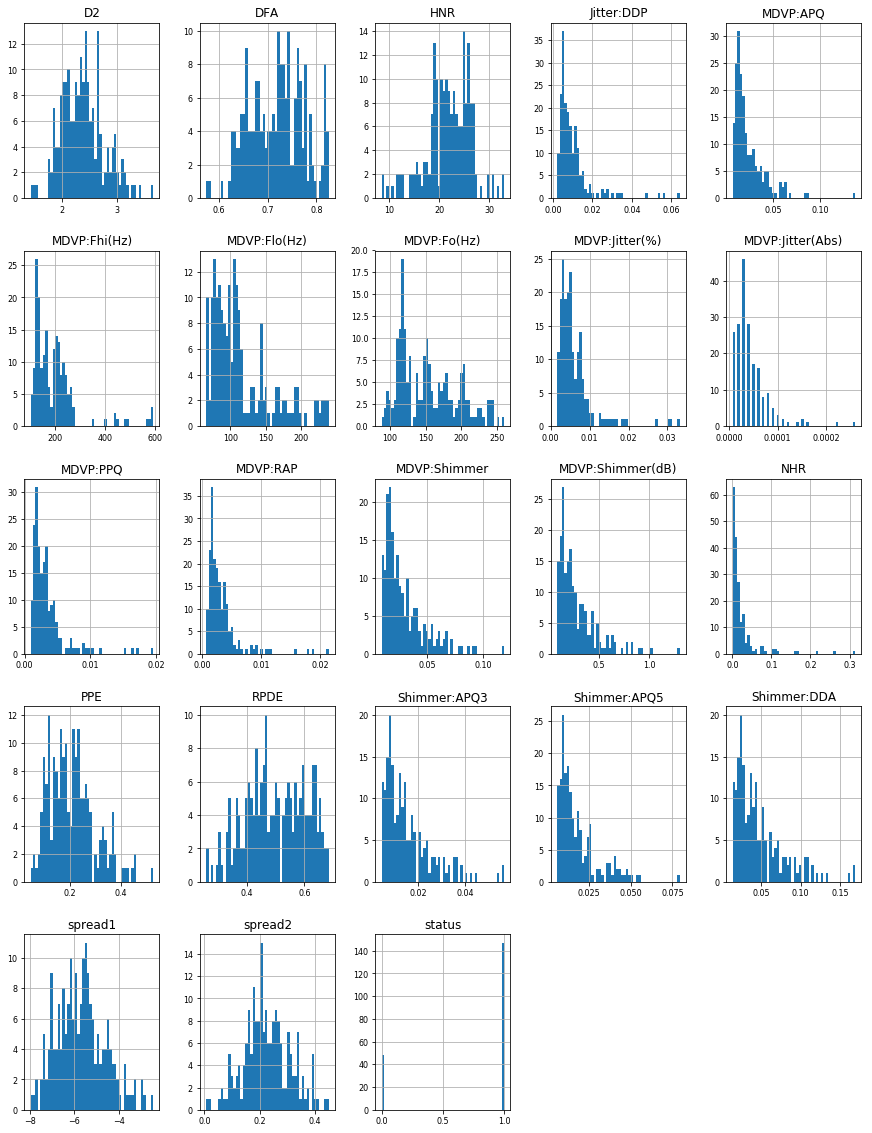

In [10]:
park_df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

#### 3. Univariate & Bivariate Analysis

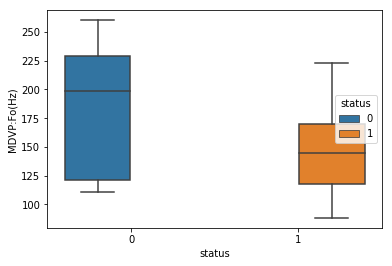

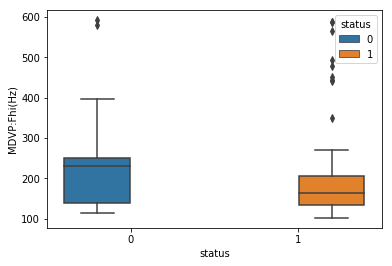

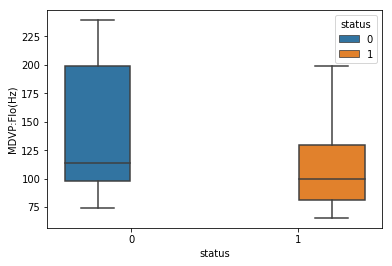

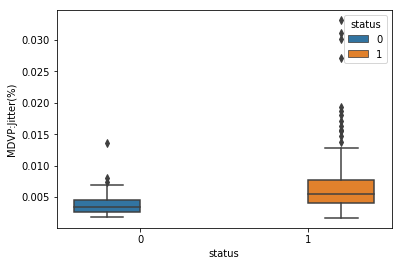

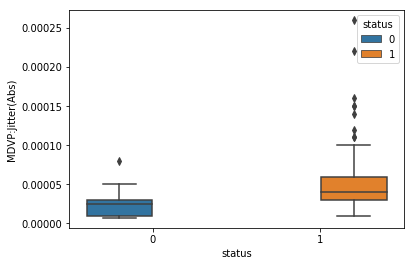

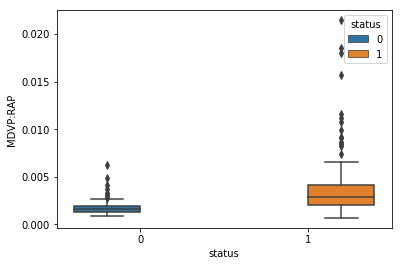

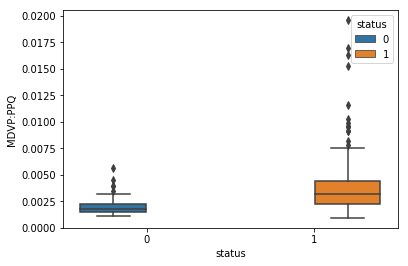

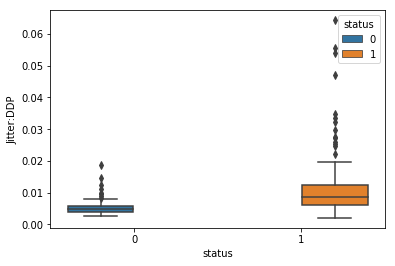

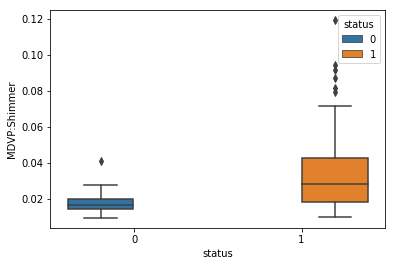

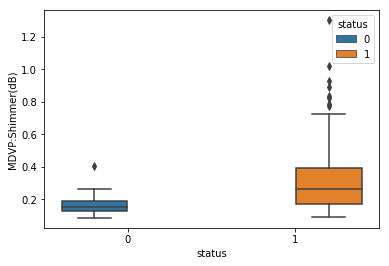

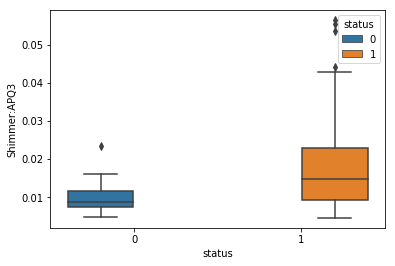

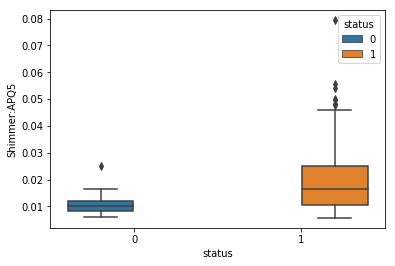

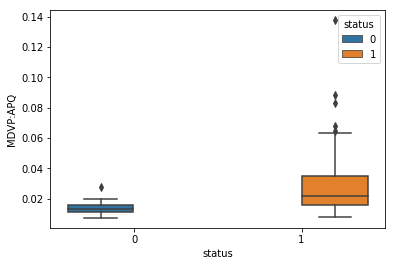

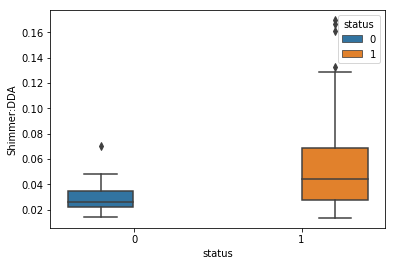

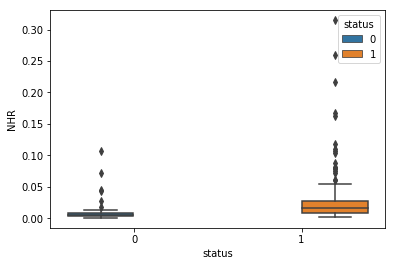

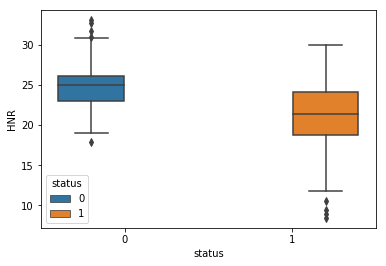

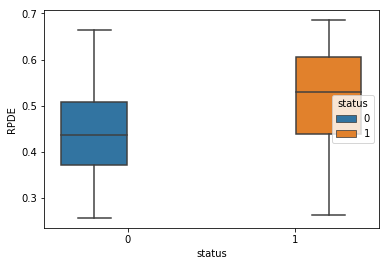

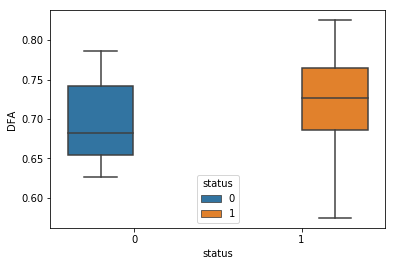

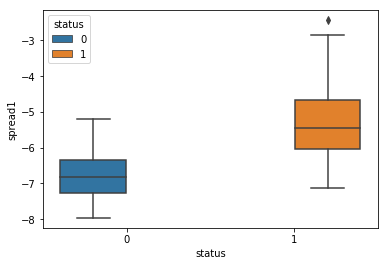

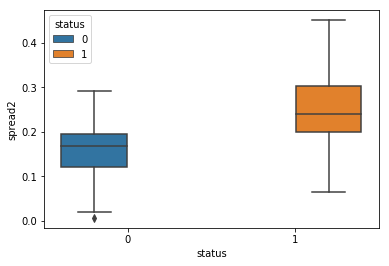

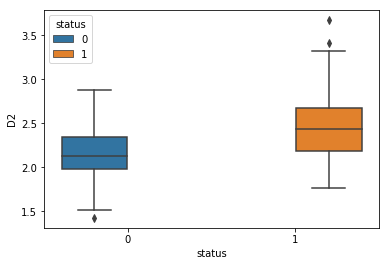

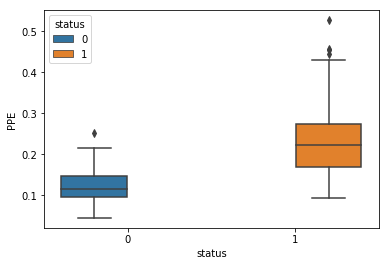

In [11]:
import seaborn as sns

sns.boxplot(x="status", y="MDVP:Fo(Hz)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Fhi(Hz)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Flo(Hz)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Jitter(%)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Jitter(Abs)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:RAP", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:PPQ", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="Jitter:DDP", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Shimmer", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:Shimmer(dB)", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="Shimmer:APQ3", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="Shimmer:APQ5", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="MDVP:APQ", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="Shimmer:DDA", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="NHR", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="HNR", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="RPDE", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="DFA", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="spread1", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="spread2", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="D2", hue="status", data=park_df)
plt.show()

sns.boxplot(x="status", y="PPE", hue="status", data=park_df)
plt.show()

##### Columns like MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP etc. have high ouliers, are right skewed and also the median value is very small. 
#### Let's check the correlation

In [12]:
park_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


##### There is no strong correlation between any variables
##### Columns like MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, HNR, RPDE, spread1, spread2, D2, PPE have moderate correlation with the target variable - status
##### spread1 has a significant correlation with spread2,D2,PPE

#### Let's Check the correlation of all the independent variables with the target variable:

In [13]:
park_df.corr()["status"]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

##### This shows that there is no strong correlation between any independent variable and dependent variable "status"

#### 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=1)

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [16]:
from sklearn.metrics import accuracy_score
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

#### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [17]:
dtree1 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=2, min_samples_leaf=2)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
y_predict = dtree1.predict(X_test)
accuracy_score(y_test, y_predict)

0.8135593220338984

In [19]:
dtree2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=4, min_samples_leaf=2)
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
y_predict = dtree2.predict(X_test)
accuracy_score(y_test, y_predict)

0.8813559322033898

In [21]:
dtree3 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=5, min_samples_leaf=3)
dtree3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
y_predict = dtree3.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

In [23]:
dtree4 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=8 , min_samples_leaf=7)
dtree4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=7,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
y_predict = dtree4.predict(X_test)
accuracy_score(y_test, y_predict)

0.8813559322033898

In [25]:
dtree5 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=10 , min_samples_leaf=5)
dtree5.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_predict = dtree5.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

In [27]:
dtree6 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=12, min_samples_leaf=2)
dtree6.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_predict = dtree6.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

In [29]:
dtree7 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=15 , min_samples_leaf=2)
dtree7.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_predict = dtree7.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

In [31]:
dtree8 = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=15 , min_samples_leaf=2)
dtree8.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
y_predict = dtree8.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

In [33]:
dtree9 = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_leaf_nodes=15 , min_samples_leaf=2)
dtree9.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_predict = dtree9.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

In [35]:
dtree10 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=15 , min_samples_leaf=2)
dtree10.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_predict = dtree10.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

##### Here we can observe that increasing the max_depth may not have any effect on acuracy but decreasing the max_depth has led to an increase in the accuracy.

#### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[14,  5],
       [ 3, 37]], dtype=int64)

In [40]:
Rf_cr=metrics.classification_report(y_test , y_predict)
print(Rf_cr)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.88      0.93      0.90        40

   micro avg       0.86      0.86      0.86        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.86      0.86      0.86        59

